Plan: 

1 A good title, and think aobut the topic for this notebook
2 summary
3 which dataset I will use, what kind of ways for visualizing data

In [1]:
# Load the libraries that you will require in this notebook
from os import path
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure, show, rc
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Set plotting options
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 5)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load a specified file to a Pandas dataframe
gps = pd.read_csv('dataset/dataset/sensing/gps/gps_u02.csv', index_col=False)

In [3]:
# Review the data with "head()"
# gps.head(3) will return 3 records
# gps.tail() will return the records from the end of the dataset
gps.head(10)

,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travel_state
0,1364357797,network,wifi,20.000,43.707127,-72.293314,0.0,0.0,0.0,stationary
1,1364358997,network,wifi,20.000,43.707123,-72.293319,0.0,0.0,0.0,stationary
2,1364360197,network,wifi,20.000,43.707166,-72.293272,0.0,0.0,0.0,stationary
3,1364361397,network,wifi,20.000,43.707158,-72.293285,0.0,0.0,0.0,stationary
4,1364362597,network,wifi,20.000,43.707131,-72.293320,0.0,0.0,0.0,stationary
5,1364363797,network,wifi,20.000,43.707123,-72.293288,0.0,0.0,0.0,stationary
6,1364365002,gps,NaN,8.000,43.707182,-72.292976,159.5,0.0,0.0,NaN
7,1364366197,network,wifi,31.201,43.707122,-72.293282,0.0,0.0,0.0,stationary
8,1364367397,network,wifi,20.000,43.707134,-72.293293,0.0,0.0,0.0,stationary
9,1364368597,network,wifi,29.711,43.707122,-72.293256,0.0,0.0,0.0,stationary


In [4]:
# Review data types with "info()"
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 10 columns):
time            6607 non-null int64
provider        6607 non-null object
network_type    6344 non-null object
accuracy        6607 non-null float64
latitude        6607 non-null float64
longitude       6607 non-null float64
altitude        6607 non-null float64
bearing         6607 non-null float64
speed           6607 non-null float64
travel_state    6290 non-null object
dtypes: float64(6), int64(1), object(3)
memory usage: 516.2+ KB


In [5]:
# Review numeric data with "describe()"
gps.describe()

,time,accuracy,latitude,longitude,altitude,bearing,speed
count,6.607000e+03,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,1.367687e+09,74.158883,43.706182,-72.292437,5.554109,2.390404,0.032516
std,1.624653e+06,255.141546,0.025016,0.017621,27.636964,23.205340,0.625369
min,1.364358e+09,3.000000,43.512803,-72.754270,0.000000,0.000000,0.000000
25%,1.366349e+09,25.118500,43.706573,-72.293224,0.000000,0.000000,0.000000
50%,1.368036e+09,36.122000,43.707108,-72.293184,0.000000,0.000000,0.000000
75%,1.369049e+09,58.230000,43.707131,-72.288852,0.000000,0.000000,0.000000
max,1.370057e+09,4027.000000,44.353047,-72.267886,306.100006,351.700000,35.003570


In [6]:
# Create a new dataframe containing the count of records grouped by provider
group_provider = gps.groupby(['provider']).count().reset_index()

# Display the dataframe
group_provider

,provider,time,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travel_state
0,gps,263,0,263,263,263,263,263,263,0
1,network,6344,6344,6344,6344,6344,6344,6344,6344,6290


In [7]:
# Change the line below to add "travelstate" to the groupby statement
#grouped = gps.groupby(['network_type']).count()
gps_network = gps.groupby(['provider','network_type','travel_state']).count()

#grouped = gps.groupby(['provider', 'network_type', 'travelstate']).count()
# Display the new variable
#grouped

gps_network

time  accuracy  latitude  longitude  \
provider network_type travel_state                                        
network  cell         moving          57        57        57         57   
                      stationary      13        13        13         13   
         wifi         moving         942       942       942        942   
                      stationary    5278      5278      5278       5278   

                                    altitude  bearing  speed  
provider network_type travel_state                            
network  cell         moving              57       57     57  
                      stationary          13       13     13  
         wifi         moving             942      942    942  
                      stationary        5278     5278   5278

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10b3a0160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10b87e6d8>], dtype=object)

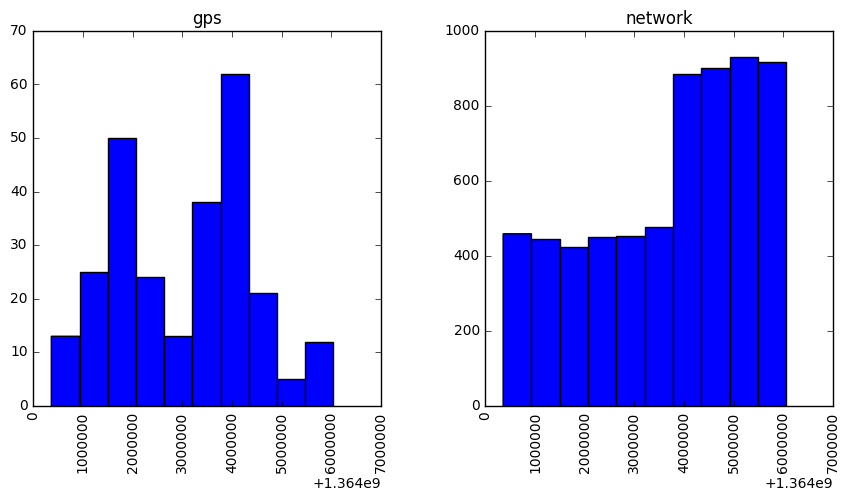

In [8]:
# Let's look at the observations or rows over time per provider as histograms
#gps['time'].hist(by=gps['provider'])
gps['time'].hist(by=gps['provider'])